In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# Discrete Probability Distributions

We will start with a simple discrete probability distribution: the Discrete Uniform Distribution.  In python this is the randint distribution.  The discreet uniform distribution with parameters (a,b) constructs a random variable that has an equal probability of being any one of the intergers in the range of [a,b].  An example is rolling a fair 6 sided die.  [See scipy documentation radnint.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)

In [290]:
#  import the uniform discrete function
from scipy.stats import randint
#  the low value for a fair die s 1 and the high value is 6; there are 6 possible and equaly likely outcomes
# the pmf = 1/(b-a+1) or 1/n
n=6
# you can run an emperical experiment or simulation to see the emperical probability of the outcome
# if you generate random numbers usng a discrete probability distribution then you can plot these
#  Lets roll a fair sided die; for the interval of low=low, high=high-1
# Here we are saying that there aee 6 outcomes, each of equal probability
# We are using the .rsv atribute to produce random variables that fit the specified probability dstribution
randomvarUniform=randint.rvs(1,7,loc=0)
print(randomvarUniform)

2


In [291]:
# let's roll the die 10 times
randomvarUniform=randint.rvs(1,7,size=10)
print(randomvarUniform)

[1 2 1 4 4 3 6 6 2 5]


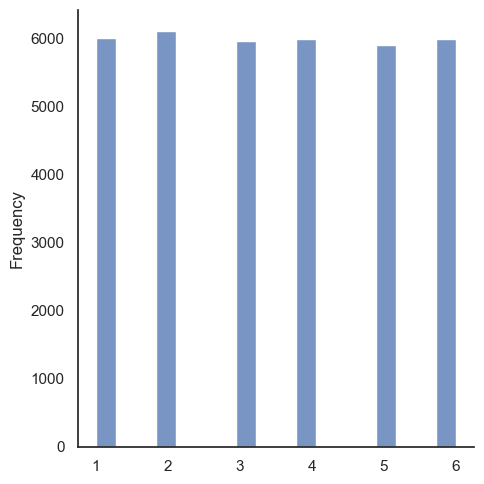

In [292]:
# let's roll it 10,000 times and plot it on a frequency histogram
randomvarUniform=randint.rvs(1,7,size=10000)
ax=sns.displot(randomvarUniform,stat='frequency')

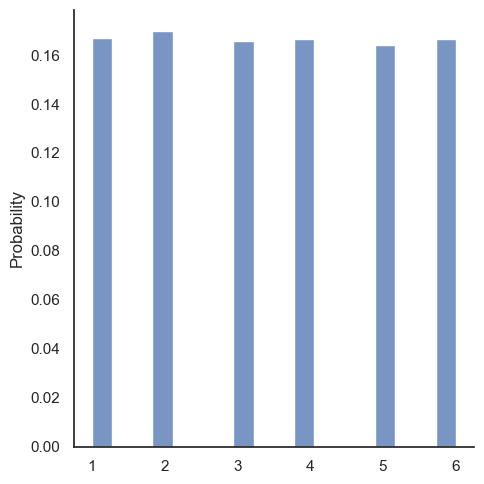

In [293]:
# let's see it as a probability plot
# now can see the emperical probabilities of each outcome is around 0.16667
ax=sns.displot(randomvarUniform,stat='probability')

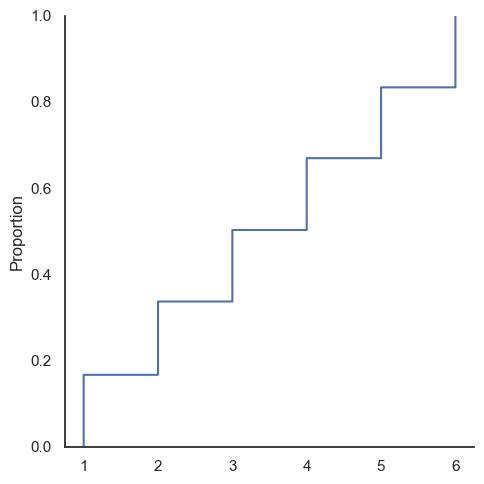

In [294]:
# Plotting the emperical cumuluative distribution function will show the cumulative probabilty up to a certain x
ax=sns.displot(randomvarUniform,kind='ecdf')

In [295]:
# now let's find and plot the theoretical prbability mass function (pmf) based on knowing the parametrs of the distribution
n=6
p=1/n
x=np.arange(1,n+1)
uniformDiscrete_pmf=randint.pmf(x,1,7)
print(uniformDiscrete_pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [296]:
# This is the same as finding the uniform discrete pmf of the nmbers 1,2,3,4,5,6 using the pmf formula:  PMF=1/n
# now plot the pmf

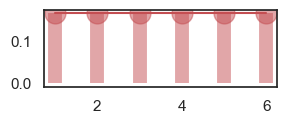

In [297]:
plt.plot(x,uniformDiscrete_pmf,'ro',ms=15,alpha=0.5)
plt.plot(x,uniformDiscrete_pmf,'r')
plt.vlines(x,0,uniformDiscrete_pmf,color='r',linestyle='-',lw=10, alpha=.5)

We can show that the probability distribution plot from a simulation (from the uniform discreet random variable generator provided with the parameters of a uniform discrete distribution) is the same as the theoretical plot of the probability mass function provided with the parameters.  

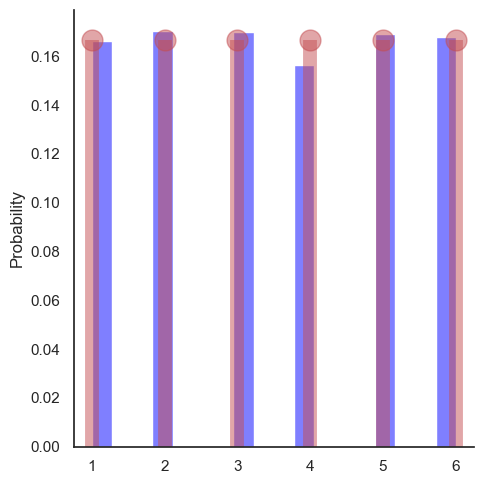

In [298]:
# Let's show the probability distribution on the plot of the emperical probabilities
randint_rvs=randint.rvs(1,7,size=10000)
ax=sns.displot(randint_rvs,stat='probability',color="blue",alpha=.5)
plt.plot(x,uniformDiscrete_pmf,'ro',ms=15,alpha=0.5)
plt.vlines(x,0,uniformDiscrete_pmf,color='r',linestyle='-',lw=10, alpha=.5)

In [299]:
# The cumulative distribution function shows the cumulative probability that X wil take on a value less than or equal to x
# compute and plot the cdf of a uniform discrete distribution

In [300]:
x=np.arange(1,n+1,1)
uniformDiscrete_cdf=randint.cdf(x,1,7)
print(uniformDiscrete_cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


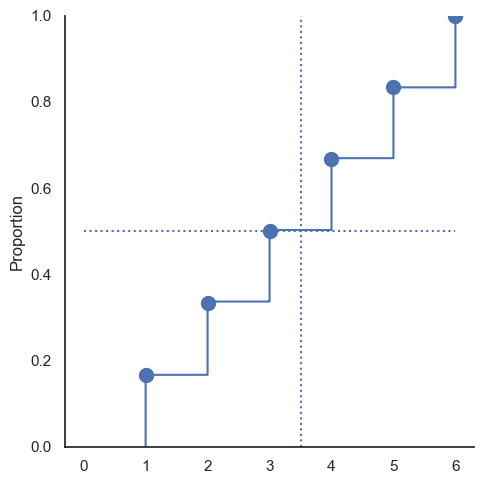

In [301]:
#  plot the cdf of the probabilites as a step function
ax1=sns.displot(randomvarUniform,kind='ecdf')
plt.hlines(0.5,0,6,linestyle=":")
plt.vlines(3.5,0,1,linestyle=":")
plt.plot(x,uniformDiscrete_cdf,'bo',ms=10)

In [302]:
# expected value or mean of the distribution
randint.mean(1,7)

3.5

In [303]:
# at what value x is 50% (0.5 of the total probability) accounted for?
# What is the 50th percentile of this distribution?
# q= percentile=0.5
# ppf is percent point function (inverse of cdf)
randint.ppf(0.5,1,7)

3.0

In [304]:
# variance of the distribution
randint.var(1,7)

2.9166666666666665

# The binomial distribution
Use the [binomial distribution from scipy stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).  binom takes the number of trials and the probability of a success as shape parameters, where p is the probability of a single success and 1-p is the probability of a single failure. Rember BINS.

BINS
- Each trial has two possible outcomes: Binomial: success or failure.
- The trials are independent, meaning the outcome of one trial doesn’t influence that of any other.
- There are a fixed number of trials (n).
- The probability of success (call it p) is the same for each trial.

parameters of n and p

Counts of an object that can be 0 or 1 out of a total set number of objects.

Models the number of successes in a sample of size n drawn with replacement from a population of size N.

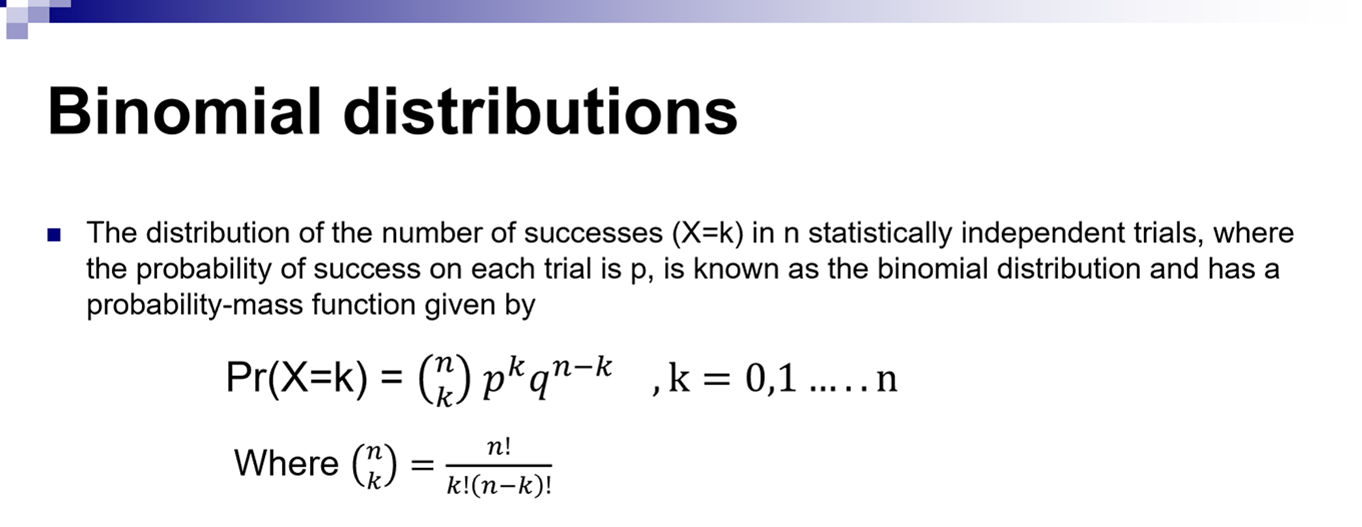

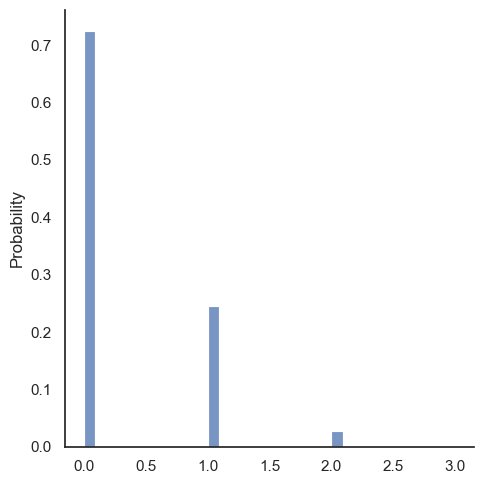

In [322]:
from scipy.stats import binom
# Let's generate some simulated data that follow a binomial distribution and plot the distibuion of this simulated data
# we will say use n=3 and p=0.1 and simulate 10000 randon variables ~Binom(3,0.1)
n=3
p=0.1
binomial_rvs=binom.rvs(n,p,size=10000)
ax1=sns.displot(binomial_rvs,stat='probability')

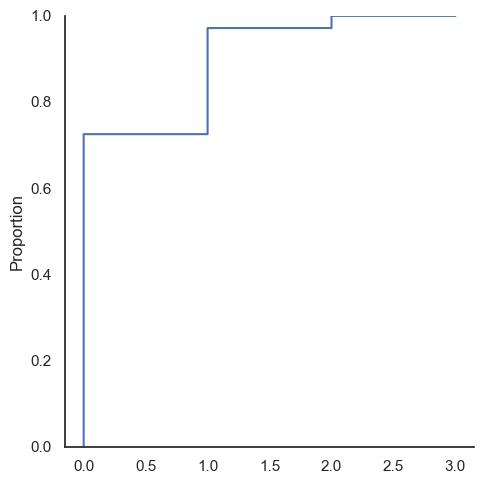

In [323]:
# Plotting the empirical cumuluative distribution function will show the cumulative probabilty up to a certain x
ax1=sns.displot(binomial_rvs,kind='ecdf')

Now using the theoretical probability distributions for stats.binom

Machine 1,2,3 are either working or not working, each machine independently has a 10% chance of being down

success= not working = D

The sample space is all of the possible outcomes of the experiment (set of trials) = 3 machines working

UUU  
UUD  
UDU  
UDD  
DUU  
DUD  
DDU  
DDD  

We are defining the event (the subset of outcomes) as the number of machines not working (being Down).  The number of machines that are down is a binomial random variable (X) with parameters n = 3 and p = 0.10.  

X ~ Bin(n,p)

You can have {0,1,2,3} machines working or not working out of 3 machines

We will work with this modeling the random variable X as a binomial probability distribution

What is the probability of each of these numbers of working or not working machines? 

What is the probability of k= the number of successes (let's define this as machine not working) that you get out of 3 machines running?

In [324]:
n=3
p=0.1
x=np.arange(0,n+1)
binomial_pmf=binom.pmf(x,n,p)
print(binomial_pmf)
# the probabilities of having 0,1,2,3 successes

[0.729 0.243 0.027 0.001]


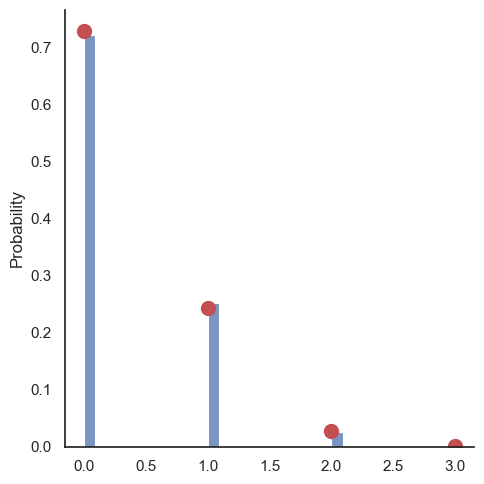

In [325]:
# plot the thoretical probabiities in red over the empircal probabilties in default blue
binomial_rvs=binom.rvs(n,p,size=10000)
ax1=sns.displot(binomial_rvs,stat='probability')
ax2=plt.plot(x,binomial_pmf, 'ro',ms=10)

In [326]:
# find the cdf of the binomial distribution using the probability distribution parameters
x=np.arange(0,n+1)
binomial_cdf=binom.cdf(x,n,p)
print(binomial_cdf)

[0.729 0.972 0.999 1.   ]


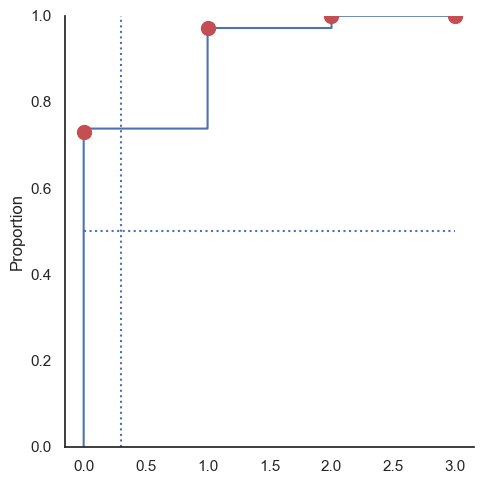

In [319]:
# Plotting the cdf points
ax=sns.displot(binomial_rvs,kind='ecdf')
ax=plt.plot(x,binomial_cdf, 'ro',ms=10)
plt.hlines(0.5,0,3,linestyle=":")
plt.vlines(0.3,0,1,linestyle=":")

In [327]:
# expected value or mean of the distribution
# n= 3, p = 0.10
# for every 3 machines that are running, about 0.3 machines will not be working, on average
binom.mean(n,p)

0.30000000000000004

[0 0 0 ... 0 0 0]


Text(0.5, 12.44444444444443, 'number of birthday matches= n')

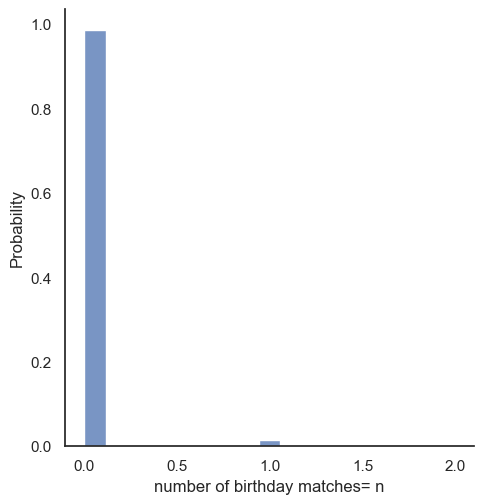

In [328]:
# Birthday problem binomial 
# Probability of having 2 people with specific birthday out of 5 people
# 0 out of 5 at high prob
# 1 out of 5 at low prob
# more than 1 out of 5 very very small
n=5
p=0.0027
binomial_rvsBD=binom.rvs(n,p,size=50000)
ax1=sns.displot(binomial_rvsBD,stat='probability')
print(binomial_rvsBD)
plt.xlabel("number of birthday matches= n")

In [329]:
n=5
x=np.arange(0,n+1)
binomial_pmfBD=binom.pmf(x,n,0.0027)
print(binomial_pmfBD)

[9.86572703e-01 1.33547894e-02 7.23111029e-05 1.95768553e-07
 2.65003055e-10 1.43489070e-13]


P(no people out of 5 with same specific birthday) = 0.986

P(at least 1 people with same specific birthday, n=1=number of matches) = 1 - 0.986 = 0.014

This is a binomial distribution of the number of matches within a group size.  

What is the probability of have exactly n=2 matches in a group of 5?

can use the Binomial distribution  
PMF(x=k) = (n choose k) * p^k * q^(n-k) to model and calculate these

In [330]:
binom.pmf(2,5,.0027)

7.231110288810927e-05

In [331]:
n=5
x=np.arange(0,n+1)
binomial_cdfBD=binom.cdf(x,n,0.0027)
print(binomial_cdfBD)

[0.9865727  0.99992749 0.9999998  1.         1.         1.        ]


# Tossing a coin

Success is flipping a heads

Toss 1 coin 10 or 10,000 times (n=1, size=10,000)

Toss 2 coins 10,000 times (n=2, size=10,000)

Toss 10 coins 10,000 times (n=100, size =10,000)

Each time you specify a set of parameters n and p, a particular binomial probability distribution can be generated, of the specified shape.

Whenever p = 0.5, the binomial distribution will be symmetrical.  
When p ≠ 0.5, the distribution will be skewed. If p < 0.5, the distribution will be positive or right skewed. If p > 0.5, the distribution will be negative or left skewed. 

The closer p is to 0.5 and the larger the number of observations in the sample, n, the more symmetrical the distribution will be.

Try out an unfair coin (probability of a heads less than or greater than 0.5)

change stat = from count to probability.

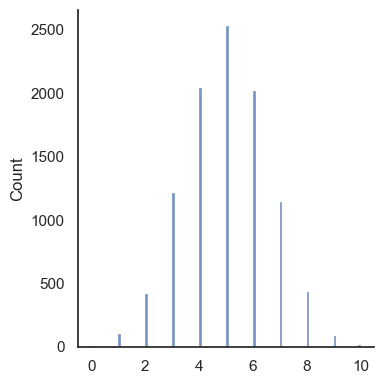

In [347]:
np.random.seed(seed=233423)
n=10
p=0.5
binomial_rvs=binom.rvs(n,p,size=10000)
sns.displot(binomial_rvs,stat='count',height=4,aspect=1,bins=100)

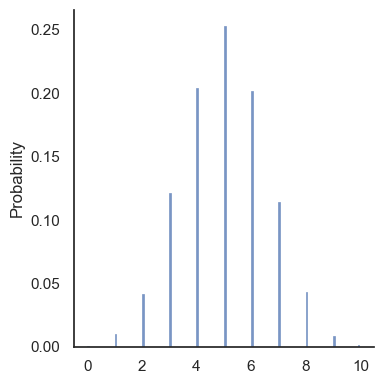

In [335]:
np.random.seed(seed=233423)
n=10
p=0.5
binomial_rvs=binom.rvs(n,p,size=10000)
sns.displot(binomial_rvs,stat='probability',height=4,aspect=1,bins=100)

In [336]:
binomial_rvs

array([7, 7, 6, ..., 6, 4, 6], dtype=int64)

In [333]:
binom.mean(n,p)

5.0

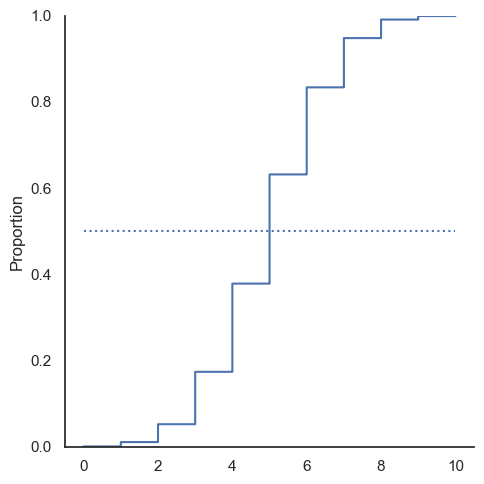

In [351]:
# Plotting the cdf points
ax=sns.displot(binomial_rvs,kind='ecdf')
plt.hlines(0.5,0,10,linestyle=":")

# The Poisson distribution
Use the [Poisson distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html). It is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.The Poisson distribution can also be used for the number of events in other specified interval types such as distance, area or volume.  ~Pois(rate=lamda=$\lambda$)   

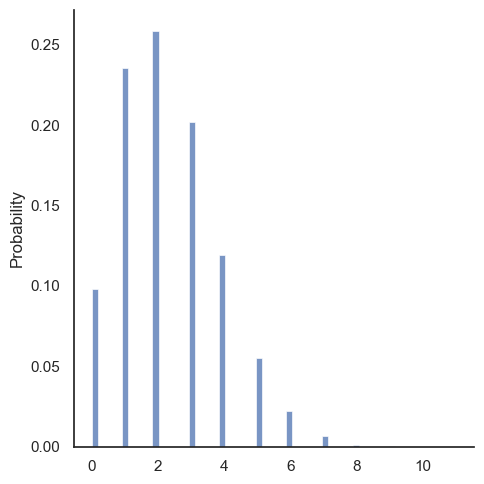

In [352]:
from scipy.stats import poisson
# first again we will look at simulating some data that follow a Poisson distribution
rateA=2.3
poisson_rvs=poisson.rvs(rateA,size=10000)
ax1=sns.displot(poisson_rvs,stat='probability')

Compare this with using the poisson distribution to find probabilities.  If we state that the rate = 2.3 deaths from typhoid fever over a 1-year period, when you assume that the underlying distribution for annual death from typhoid fever is a Poisson distribution, find the probabilitys of the number of deaths.

In [353]:
xPoisson=np.arange(0,10,1)
poisson_pmf=poisson.pmf(xPoisson,rateA)
print(poisson_pmf)
# the probability of count of the number of deaths in 1 year

[0.10025884 0.23059534 0.26518464 0.20330823 0.11690223 0.05377503
 0.02061376 0.00677309 0.00194726 0.00049763]


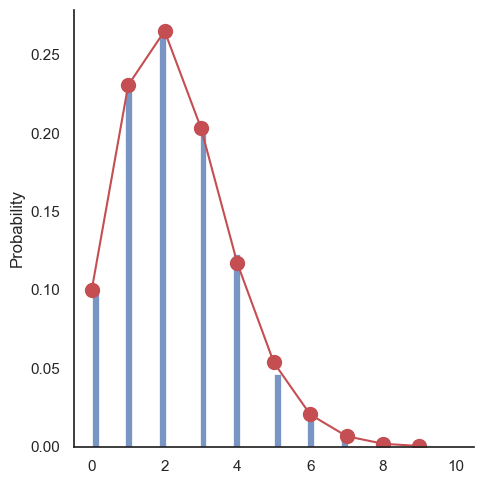

In [354]:
# plot the thoretical probabiities in red over the empircal probabilties in default blue
poisson_rvs=poisson.rvs(rateA,size=10000)
ax1=sns.displot(poisson_rvs,stat='probability')
ax2=plt.plot(xPoisson,poisson_pmf, 'ro',ms=10)
ax3=plt.plot(xPoisson,poisson_pmf, 'r')

In [355]:
# Probability of x=3 deaths/year?
poisson_pmf=poisson.pmf(3,rateA)
print(poisson_pmf)

0.20330822526255884


In [356]:
# Probability less than some value
# Probability of 3 or less deaths/year?
P1=poisson.cdf(3,rateA)
print(P1)

0.7993470511946271


From the above values of the pmf you can add these probabilities to get the same number [0.10025884 0.23059534 0.26518464 0.20330823 0.11690223 0.05377503, 0.02061376 0.00677309 0.00194726 0.00049763]

In [357]:
# P(3 or less deaths/year)
0.1003+0.2306+0.2652+0.2033

0.7994

In [358]:
# Probability greater than some value
# Remember the first couple of laws of probabiity: all possible probabilities sum to 1 and the complement rule
# What is the probability of havinng more than 6 deaths/year?
P2=1-(poisson.cdf(6,rateA))
print(P2)

0.009361933891041896


In [359]:
# can check by adding the pmf at x=7,8,9,10...
0.00677+0.00195+0.0005

0.00922